In [1]:
%matplotlib inline

**Visualizacao dos dados antes da clusterizacao

Automatically created module for IPython interactive environment


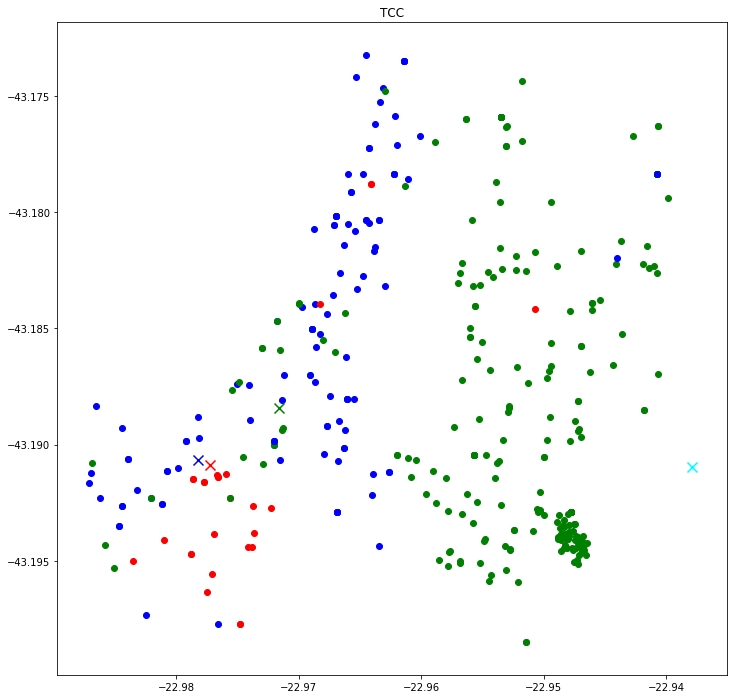

In [41]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

# Read user data
filename= 'ceps_copa_botafogo_aps_centroids_comformula'
ext = '.csv'
df = pd.read_csv(filename+ext)
# Get the latitude and logitude of the users
coords = df.as_matrix(columns=['Latitude', 'Longitude','aps_normalizada'])

colors = ['blue', 'green', 'red', 'cyan', 'gray']

plt.figure(figsize=(12, 12))

aps_arr = np.array([[-22.978205,-43.190641,0], [-22.971622,-43.188442,1], [-22.977273,-43.190863,2], [-22.937902,-43.190976,3]])
for i in range (0, len(coords)): 
    plt.scatter(coords[i,0], coords[i, 1], color=colors[int(coords[i,2])])
for i in range (0, len(aps_arr)):    
    plt.scatter(aps_arr[i,0], aps_arr[i,1], s=100, marker="x", color=colors[int(aps_arr[i,2])])
plt.title("TCC")
plt.show()


# Demonstration of k-means assumptions


This example is meant to illustrate situations where k-means will produce
unintuitive and possibly unexpected clusters. In the first three plots, the
input data does not conform to some implicit assumption that k-means makes and
undesirable clusters are produced as a result. In the last plot, k-means
returns intuitive clusters despite unevenly sized blobs.



Automatically created module for IPython interactive environment
[[-22.95052878 -43.19260638]
 [-22.96573307 -43.18351257]
 [-22.94891043 -43.18076362]
 [-22.97844629 -43.19189818]]
[1 3 3 3 3 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 3 3 1 3 3 3 1 1 1 1 3
 1 1 1 1 1 1 1 3 3 1 3 1 1 3 1 3 3 1 3 1 1 1 3 3 3 1 3 3 3 1 3 1 1 1 1 1 3
 3 3 3 1 3 3 1 1 3 1 1 1 3 1 3 1 1 1 1 3 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 3 1
 3 1 1 3 1 3 1 1 1 3 3 3 3 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 3 3 3 3
 1 3 1 0 0 0 0 1 2 0 2 2 0 3 1 3 3 3 2 2 1 0 3 1 0 3 0 2 3 2 1 0 0 1 0 2 0
 0 2 2 0 2 2 2 2 0 0 1 0 1 2 2 2 2 2 2 0 2 0 2 0 0 0 2 2 0 2 2 0 2 0 0 2 2
 2 0 2 0 0 0 0 0 0 0 2 2 2 0 0 2 0 2 0 0 2 0 0 0 1 0 2 0 0 2 0 2 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 2 2 2 0 0 2 0 2 2 2 0 2 2 0 0 0 0 2 0 2 0 0 0 1 2
 2 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 0 0 0 2 0 0 2 2 0 2 2 0 0 0 0 2 0 0 0 0 0
 2 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 2 0 2 2 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 2 0]


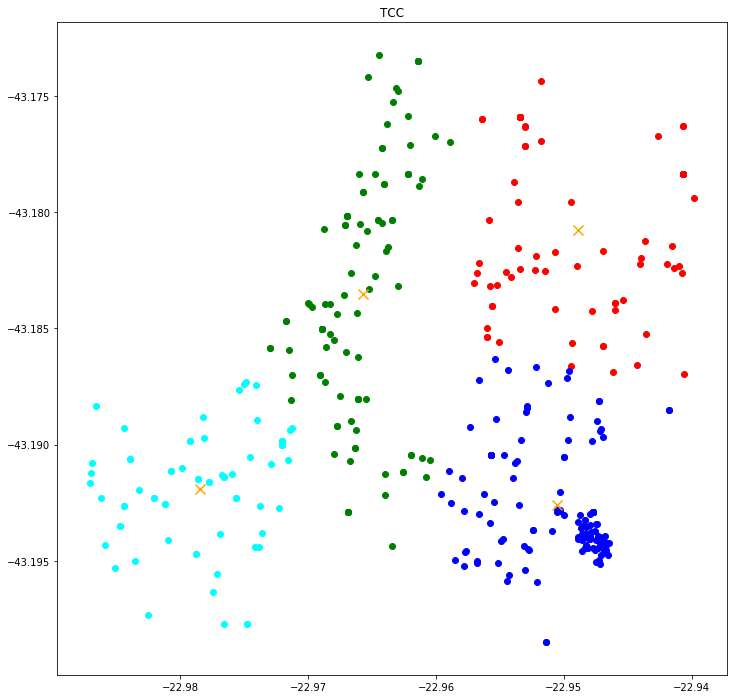

In [42]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

# Read user data
filename= 'ceps_copa_botafogo_aps_para_clusterizar'
ext = '.csv'
df = pd.read_csv(filename+ext)
# Get the latitude and logitude of the users
coords = df.as_matrix(columns=['Latitude', 'Longitude'])

# distancia geografica
kmeans = KMeans(n_clusters=4, random_state=0, n_jobs=-1).fit(coords)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

colors = ['blue', 'green', 'red', 'cyan', 'gray']

plt.figure(figsize=(12, 12))

#gera um arquivo com os elementos dos clusters e seus clusters
ofile  = open(filename+'_agrupado'+ext, "w")

centers = np.array(kmeans.cluster_centers_)
#gera um arquivo de dados agrupados no formato: 
#elementoLat, elementoLong, centroidLat, centroidLong, label
ofile.write('Latitude,Longitude,centerLat,centerLong,grupo\n')
for i, l in enumerate(kmeans.labels_):
    plt.scatter(coords[i,0], coords[i, 1], color=colors[l])
    line =  '%.7f,%.7f,%.7f,%.7f,%s\n' % (coords[i,0], coords[i, 1], centers[l,0], centers[l,1], l)
    ofile.write(line)
  
ofile.close()
plt.scatter(centers[:,0], centers[:,1], s=100, marker="x", color='orange')
plt.title("TCC")
plt.show()

# Estuda as distancias to_be dos CEPs em relacao as APS

In [6]:
import math

def geocalc(start_lat, start_long, end_lat, end_long):

    start_lat = math.radians(start_lat)
    start_long = math.radians(start_long)
    end_lat = math.radians(end_lat)
    end_long = math.radians(end_long)

    d_lat = math.fabs(start_lat - end_lat)
    d_long = math.fabs(start_long - end_long)

    EARTH_R = 6372.8

    y = ((math.sin(start_lat)*math.sin(end_lat)) + (math.cos(start_lat)*math.cos(end_lat)*math.cos(d_long)))

    x = math.sqrt((math.cos(end_lat)*math.sin(d_long))**2 + ( (math.cos(start_lat)*math.sin(end_lat)) - (math.sin(start_lat)*math.cos(end_lat)*math.cos(d_long)))**2)

    c = math.atan(x/y)

    return EARTH_R*c

filename = 'ceps_copa_botafogo_aps_para_clusterizar'
ext = '.csv'
file  = open(filename+'_agrupado'+ext, "r")
ofile  = open(filename+'_agrupado_dist_tobe'+ext, "w")
first = 1
#escreve o cabecalho do arquivo de saida
ofile.write('elemLat,elemLong,centerLat,centerLong,label,dist\n')
for line in file:
    if first:
        first=0
        continue
    else:
        fields = line.split(',')
        print(fields[0])
        f = geocalc(float(fields[0]), float(fields[1]), float(fields[2]), float(fields[3]))
        ofile.write('%s,%.3f\n' % (line[:-1],f))
file.close()
ofile.close()



-22.9670991
-22.9839115
-22.9792041
-22.9839115
-22.9844111
-22.9740535
-22.9668457
-22.9669548
-22.9807567
-22.9766010
-22.9712302
-22.9626153
-22.9669548
-22.9659945
-22.9644929
-22.9739816
-22.9687857
-22.9653210
-22.9621959
-22.9631215
-22.9669548
-22.9614409
-22.9669548
-22.9626153
-22.9858454
-22.9717478
-22.9750051
-22.9782332
-22.9687136
-22.9792041
-22.9807567
-22.9781081
-22.9668457
-22.9621646
-22.9633947
-22.9645233
-22.9798824
-22.9621959
-22.9677087
-22.9645233
-22.9614409
-22.9621959
-22.9614409
-22.9639633
-22.9851232
-22.9865556
-22.9629495
-22.9769047
-22.9660917
-22.9697135
-22.9756546
-22.9689026
-22.9748916
-22.9720614
-22.9686243
-22.9747594
-22.9652183
-22.9640719
-22.9682999
-22.9745731
-22.9728835
-22.9720434
-22.9642593
-22.9756546
-22.9714027
-22.9754420
-22.9663240
-22.9720515
-22.9638123
-22.9677087
-22.9629505
-22.9657015
-22.9614409
-22.9720434
-22.9715362
-22.9844176
-22.9846964
-22.9640719
-22.9846964
-22.9825018
-22.9601065
-22.9647490
-22.9870886
-22.

Calcula as distancias AS_IS, ou seja, em relação as agencias localizadas atualmente

In [7]:
import math

def geocalc(start_lat, start_long, end_lat, end_long):

    start_lat = math.radians(start_lat)
    start_long = math.radians(start_long)
    end_lat = math.radians(end_lat)
    end_long = math.radians(end_long)

    d_lat = math.fabs(start_lat - end_lat)
    d_long = math.fabs(start_long - end_long)

    EARTH_R = 6372.8

    y = ((math.sin(start_lat)*math.sin(end_lat)) + (math.cos(start_lat)*math.cos(end_lat)*math.cos(d_long)))

    x = math.sqrt((math.cos(end_lat)*math.sin(d_long))**2 + ( (math.cos(start_lat)*math.sin(end_lat)) - (math.sin(start_lat)*math.cos(end_lat)*math.cos(d_long)))**2)

    c = math.atan(x/y)

    return EARTH_R*c

filename = 'ceps_copa_botafogo_aps_para_clusterizar'
ext = '.csv'
file  = open(filename+ext, "r")
ofile  = open(filename+'_agrupado_dist_asis'+ext, "w")
#escreve o cabecalho do arquivo de saida
ofile.write('dist\n')
first=1
for line in file:
    if first:
        first=0
        continue
    else:
        fields = line.split(',')
        print(fields[3] + ',' + fields[4] + '   ' + fields[5] + ',' + fields[6])
        f = geocalc(float(fields[3]), float(fields[4]), float(fields[5]), float(fields[6]))
        ofile.write('%.3f\n' % (f))
        if f>6:
            print(fields[0]+':%.3f' % (f));
file.close()
ofile.close()



-22.9670991,-43.1805367   -22.978205,-43.190641

-22.9839115,-43.1906061   -22.978205,-43.190641

-22.9792041,-43.1898495   -22.978205,-43.190641

-22.9839115,-43.1906061   -22.978205,-43.190641

-22.9844111,-43.1892952   -22.978205,-43.190641

-22.9740535,-43.1874285   -22.978205,-43.190641

-22.9668457,-43.1928756   -22.978205,-43.190641

-22.9669548,-43.1801647   -22.978205,-43.190641

-22.9807567,-43.1911138   -22.978205,-43.190641

-22.976601,-43.1976968   -22.978205,-43.190641

-22.9712302,-43.1869985   -22.978205,-43.190641

-22.9626153,-43.1911682   -22.978205,-43.190641

-22.9669548,-43.1801647   -22.978205,-43.190641

-22.9659945,-43.1783454   -22.978205,-43.190641

-22.9644929,-43.1732302   -22.978205,-43.190641

-22.9739816,-43.1889378   -22.978205,-43.190641

-22.9687857,-43.1807445   -22.978205,-43.190641

-22.965321,-43.1741813   -22.978205,-43.190641

-22.9621959,-43.1783486   -22.978205,-43.190641

-22.9631215,-43.1746584   -22.978205,-43.190641

-22.9669548,-43.180164

In [1]:
import pandas as pd

# Read user data
filename= 'ceps_copa_botafogo_aps_para_clusterizar_agrupado_dist_asis'
ext = '.csv'
df = pd.read_csv(filename+ext)
# Get the distance
print('Media=%.3f' % (df.dist.mean()))

print('Mediana=%.3f' % (df.dist.median()))

print('P1=%.3f' % (df.dist.quantile(0.1)))

print('P5=%.3f' % (df.dist.quantile(0.5)))

print('P9=%.3f' % (df.dist.quantile(0.9)))


Media=1.905
Mediana=1.987
P1=0.498
P5=1.987
P9=2.822
